
ANDES 2018.06.21-dev
Copyright (C) 2015-2018 Hantao Cui

ANDES comes with ABSOLUTELY NO WARRANTY
Use this software AT YOUR OWN RISK

Platform:    Linux
Interpreter: Python 3.5.2
Session:     06/25/2018 02:56:11 PM

Parsing input file ieee14_loadramp.dm.
Case file ieee14_loadramp.dm parsed in 0.0445 second.
System models initialized in 0.0065 second.

System is interconnected.

Each island has a slack bus correctly defined.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

Iter   1.  Max. Mismatch = 1.3686127
Iter   2.  Max. Mismatch = 0.3988252
Iter   3.  Max. Mismatch = 0.0061125
Iter   4.  Max. Mismatch = 0.0000013
Iter   5.  Max. Mismatch = 0.0000000
Power flow converged in 0.0499 second.
Dynamic models initialized in 0.0037 second.
Static report written to <ieee14_loadramp_out.txt> in 0.0073 second.

Eigenvalue Analysis:
Report saved.
System is small-signal stable in the initial neighbourhood.


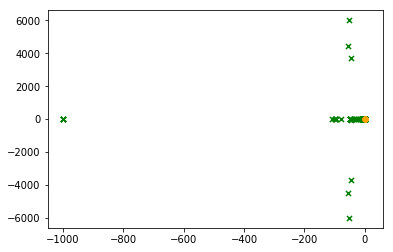

Analysis finished in 0.2681 second.

ANDES 2018.06.21-dev
Copyright (C) 2015-2018 Hantao Cui

ANDES comes with ABSOLUTELY NO WARRANTY
Use this software AT YOUR OWN RISK

Platform:    Linux
Interpreter: Python 3.5.2
Session:     06/25/2018 02:56:11 PM

Parsing input file ieee14_loadramp.dm.
Case file ieee14_loadramp.dm parsed in 0.0090 second.
System models initialized in 0.0273 second.

System is interconnected.

Each island has a slack bus correctly defined.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

Iter   1.  Max. Mismatch = 1.3686127
Iter   2.  Max. Mismatch = 0.3988252
Iter   3.  Max. Mismatch = 0.0061125
Iter   4.  Max. Mismatch = 0.0000013
Iter   5.  Max. Mismatch = 0.0000000
Power flow converged in 0.0669 second.
Dynamic models initialized in 0.0073 second.
Static report written to <ieee14_loadramp_out.txt> in 0.0092 second.

Time Domain Simulation:
Integration Method: Implicit Trapezoidal
Simulation time: 20
 (0%) Time = 0.0333s, step = 1, nit

In [1]:
%matplotlib inline

import os

from matplotlib import pyplot

from andes.main import run
from andes.plot import main as andesplot
from andes.plot import read_dat, read_label, do_plot, add_plot


tds = {
    'case': os.path.abspath('./ieee14_loadramp.dm'),
    'pert': 'load12_ramp.py',
    }

run(routine='s', **tds)
run(routine='t', **tds)



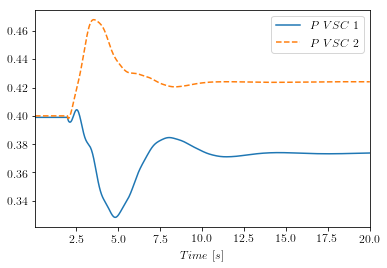

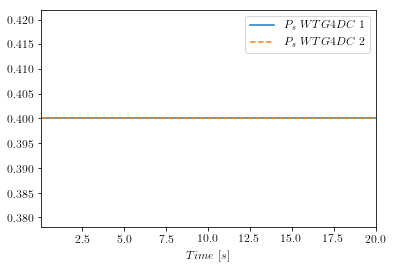

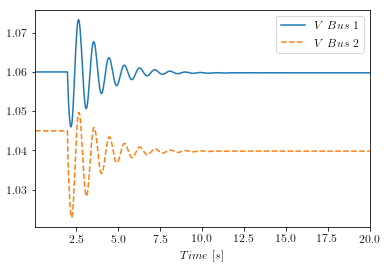

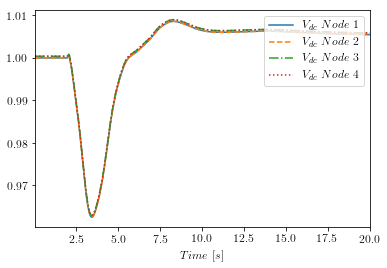

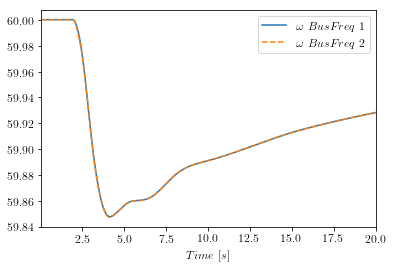

In [2]:
p_VSC = {'datfile': ['ieee14_loadramp_out.dat'],
       'x': [0],
       'y': [268, 279],
       }

andesplot(cli=False, **p_VSC)

p_WIND = {'datfile': ['ieee14_loadramp_out.dat'],
       'x': [0],
       'y': [250, 260],
       }

andesplot(cli=False, **p_WIND)

V_AC = {'datfile': ['ieee14_loadramp_out.dat'],
       'x': [0],
       'y': [135, 136],
       }
andesplot(cli=False, **V_AC)


V_DC = {'datfile': ['ieee14_loadramp_out.dat'],
       'x': [0],
       'y': [150, 151, 152, 153],
       }
andesplot(cli=False, **V_DC)


Freq_1314 = {'datfile': ['ieee14_loadramp_out.dat'],
            'x': [0],
            'y': [10, 12],
            'ytimes': '60',
            }
andesplot(cli=False, **Freq_1314)


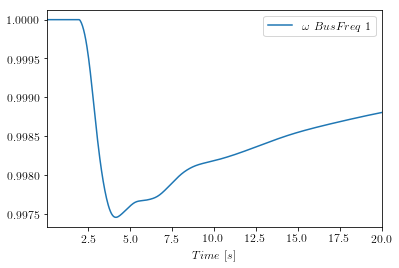

In [3]:
x_idx = [0]
y_idx = [10]

xv, yv = read_dat('ieee14_loadramp_out.dat', x_idx, y_idx)
xl, yl = read_label('ieee14_loadramp_out.lst', x_idx, y_idx)

fig, ax = do_plot(xv, yv, xl, yl, {})

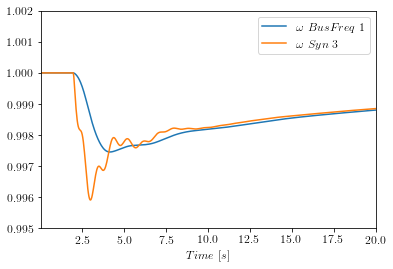

In [4]:
y_idx2 = [50]

xv2, yv2 = read_dat('ieee14_loadramp_out.dat', x_idx, y_idx2)
xl2, yl2 = read_label('ieee14_loadramp_out.lst', x_idx, y_idx2)

add_plot(xv2, yv2, xl2, yl2, fig, ax, LATEX=True)

ax.set_ylim([0.995, 1.002])
fig